# CS 315 Project 1: Data Exploration

Author: Eni Mustafaraj  
Date: Feb 9, 2024

This is a **data exploration** notebook. When we don't know the data and don't know yet what to do with them, we explore various aspects until we get a good sense of what the data is good for for.
Then, we create another notebook that only contains the relevant analysis that we want to share with the world.

**Table of Content**
1. [Loading some data](#sec1)
2. [Checking for missing values](#sec2)
3. [Checking for unique values](#sec3)
4. [Creating new columns](#sec4)
5. [Aggregate all hashtags](#sec5)
6. [Visualize Correlations with Seaborn](#sec6)

<a id="sec1"></a>
## 1. Loading some data

I will load into pandas the content of one of the files that contains one active test run.

In [1]:
# import all libraries I might need in this notebook
import os, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We know that our CSV files are in the `data` folder, so let's look them up:

In [2]:
files = os.listdir('data') # function lists the content of a directory
files

['02-09-05-18_like_by_hashtag_data_all_videos.csv',
 '02-09-05-18_like_by_hashtag_data_liked_videos.csv',
 '02-09-06-27_like_by_random_data_all_videos.csv',
 '02-09-06-27_like_by_random_data_liked_videos.csv',
 '02-09-05-31_like_by_random_data_liked_videos.csv',
 '02-09-05-39_like_by_random_data_all_videos.csv',
 '02-09-05-39_like_by_hashtag_data_all_videos.csv',
 '02-09-05-18_like_by_random_data_liked_videos.csv',
 '02-09-05-31_like_by_random_data_all_videos.csv',
 '02-09-05-18_like_by_random_data_all_videos.csv',
 '02-09-05-39_like_by_random_data_liked_videos.csv',
 '02-09-06-27_like_by_hashtag_data_all_videos.csv',
 '02-09-06-27_like_by_hashtag_data_liked_videos.csv',
 '02-09-05-39_like_by_hashtag_data_liked_videos.csv']

For the moment, we can focus only on the files that contain all the videos, since the "liked" videos are just a subset of them.

In [3]:
onlyAllData = [f for f in files if 'data_all' in f] # filtering with list comprehension
len(onlyAllData)

7

Let's look at the content of the first file, using pandas to read the CSV. Don't forget to give the relative path to the file.

In [5]:
ourpath = "data" # make sure this is the same path of your data files

df1 = pd.read_csv(os.path.join(ourpath, onlyAllData[0])) # get the first file
df1.head()

,batch,index,music,hashtag,author,likes,comments,shares,saves
0,1,0,lowe.dat - suritasarapist69,"@pkbsbl24, fyp, therealcoolspot, glitch, newtr...",therealcoolspot,399200,2440,31800,1339
1,1,1,NaN,"pesopluma, nickinicole, parati, fyp",NaN,94400,235,4138,295
2,1,2,NaN,"%D0%B2%D1%80%D0%B5%D0%BA%D0%B0%D1%85, %D0%B2%D...",NaN,101100,231,20800,471
3,1,3,NaN,"joesitalianice, anaheim, customerservice, anah...",NaN,196100,0,14500,292
4,1,4,NaN,"pawrenting101, pawrents, park, tank, yorkie, y...",NaN,3700000,8553,200200,139600


<a id="sec2"></a>
## 2. Checking for missing values

We can notice above that the scraping didn't work well for the fields "music" and "author", because some values are shown as NaN (meaning, not a number or not available). We can use pandas method `isna` to count the missing values:

In [6]:
df1[['music','author']].isna().sum() # first we find the missing values, then we count their total

music     43
author    41
dtype: int64

Let's check another file and see if that is better:

In [7]:
ourFile = os.path.join(ourpath, onlyAllData[1])
df1 = pd.read_csv(ourFile)
df1.head()

,batch,index,music,hashtag,author,likes,comments,shares,saves
0,1,0,original sound - JUAN GZ,"prank, college, coldapproach, rizz, pickupline",thatwasepic_shorts,373300,2943,34100,2509
1,1,1,Love You So - The King Khan & BBQ Show,"oktoberfest, oktoberfest2023, devilswheel, fes...",funny.game.90,25100,225,2482,764
2,1,2,original sound - hunjoe,NaN,hunjoe,71100,290,5323,1121
3,1,3,original sound - lara rose,"fyp, skit",littleprincesspoppyy,82000,297,13200,391
4,1,4,Baby Tate SHO Open Verse - Baby Tate,NaN,breckiehill,325200,1666,12900,918


In [8]:
df1[['music','author']].isna().sum()

music     0
author    0
dtype: int64

Looks good, this time none of the values for these two columns is missing. However, the "hashtag" column seem to have NaN values, but that is to be expected, because not all the posts have hashtags.

In [9]:
df1['hashtag'].isna().sum()

31

<a id="sec3"></a>
## 3. Checking for unique values

Currently, the data scraping process is not collecting the video IDs which will let us know that each row is unique. Can we use another field for that purpose?

First, let's find out the total number of rows:

In [10]:
df1.shape

(108, 9)

There are 108 rows (observations).  
Let's find the unique "author" values:

In [11]:
df1['author'].unique().size

102

It's not the same as the number of obsevations. We can check this with a boolean expression:

In [12]:
df1['author'].unique().size == df1['author'].size

False

So, we confirmed that not all values are unique. The method `value_counts()` lets us see why:

In [13]:
df1['author'].value_counts()[:5] # show the occurrences of the top 5 authors

author
hunjoe                6
stephenmakesvideos    2
thatwasepic_shorts    1
manuelenriqueee       1
itsceyandjai          1
Name: count, dtype: int64

We see that one author showed up many times. This is why we cannot rely on the field `author` as a unique identifier for a post.

<a id="sec4"></a>
## 4. Creating new columns

We will create a new column, postID, that is a combination of author + saves, in the hope that this will be a unique identifier.

In [14]:
def createPostID(row):
    """helper function: create a new value"""
    return f"{row['author']}_{row['saves']}"

df1['postID'] = df1.apply(createPostID, axis=1) # use axix=1 to process one row at a time
df1.head()

,batch,index,music,hashtag,author,likes,comments,shares,saves,postID
0,1,0,original sound - JUAN GZ,"prank, college, coldapproach, rizz, pickupline",thatwasepic_shorts,373300,2943,34100,2509,thatwasepic_shorts_2509
1,1,1,Love You So - The King Khan & BBQ Show,"oktoberfest, oktoberfest2023, devilswheel, fes...",funny.game.90,25100,225,2482,764,funny.game.90_764
2,1,2,original sound - hunjoe,NaN,hunjoe,71100,290,5323,1121,hunjoe_1121
3,1,3,original sound - lara rose,"fyp, skit",littleprincesspoppyy,82000,297,13200,391,littleprincesspoppyy_391
4,1,4,Baby Tate SHO Open Verse - Baby Tate,NaN,breckiehill,325200,1666,12900,918,breckiehill_918


**Some validation checks**

Let's check that this new atribute is unique:

In [15]:
df1['postID'].unique().size

108

In [16]:
df1.postID.size == df1['postID'].unique().size 

True

We made sure that all our posts now have a unique ID!

<a id="sec5"></a>
## 5. Aggregate all hashtags

In order to decide what hashtags to follow, I will read the hashtags of all my test runs and keep track of them to find the most popular onws. Initially, I will show how to get the list of hashtags from the dataframe column, **hashtag**.

As we saw above, while not all posts have hashtags, most of them typically have multiple hashtags separated by comma. Thus, if we write a function to be applied to each cell of the dataframe, it needs to handle both these situations.

In [17]:
from collections import Counter

allHashtagsCnt = Counter() # global variable that will be changed through the helper function

def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        allHashtagsCnt.update(htList) # method update of Counter takes a list and updates all keys

Now I will apply this function to the column `hashtag`:

In [18]:
_ = df1['hashtag'].apply(countAllHashtags) # to avoid having to see the output, I use a dummy variable

Let's see the top hashtags using the `most_common` method of the Counter object:

In [19]:
allHashtagsCnt.most_common(25)

[('fyp', 31),
 ('foryou', 13),
 ('viral', 12),
 ('fyp%E3%82%B7', 10),
 ('foryoupage', 8),
 ('rizz', 6),
 ('fy', 4),
 ('viralvideo', 4),
 ('love', 4),
 ('relatable', 3),
 ('xyzbca', 3),
 ('relationship', 3),
 ('fyp%E3%82%B7%E3%82%9Aviral', 3),
 ('blowthisup', 3),
 ('funny', 3),
 ('boys', 3),
 ('advice', 3),
 ('real', 2),
 ('cute', 2),
 ('nicksturniolo', 2),
 ('mattsturniolo', 2),
 ('chrissturniolo', 2),
 ('sturniolotriplets', 2),
 ('@sturniolo.triplets', 2),
 ('nickiminaj', 2)]

This seems to work great, so let go through all the files I collected:

In [20]:
allHashtagsCnt = Counter() # global variable; Counter dictionary

for fN in onlyAllData: # folder with files that have all posts
    path = os.path.join(ourpath, fN) # create file path
    df = pd.read_csv(path)
    _ = df['hashtag'].apply(countAllHashtags)
    print(f"Processed {path}. Unique hashtags so far: {len(allHashtagsCnt)}, total occurrences: {sum(allHashtagsCnt.values())}.")

Processed data/02-09-05-18_like_by_hashtag_data_all_videos.csv. Unique hashtags so far: 236, total occurrences: 328.
Processed data/02-09-06-27_like_by_random_data_all_videos.csv. Unique hashtags so far: 527, total occurrences: 761.
Processed data/02-09-05-39_like_by_random_data_all_videos.csv. Unique hashtags so far: 610, total occurrences: 914.
Processed data/02-09-05-39_like_by_hashtag_data_all_videos.csv. Unique hashtags so far: 918, total occurrences: 1429.
Processed data/02-09-05-31_like_by_random_data_all_videos.csv. Unique hashtags so far: 1213, total occurrences: 1964.
Processed data/02-09-05-18_like_by_random_data_all_videos.csv. Unique hashtags so far: 1436, total occurrences: 2433.
Processed data/02-09-06-27_like_by_hashtag_data_all_videos.csv. Unique hashtags so far: 1622, total occurrences: 2843.


Let us see now the top 25 hashtgas:

In [21]:
allHashtagsCnt.most_common(25)

[('fyp', 183),
 ('viral', 80),
 ('foryou', 76),
 ('fyp%E3%82%B7', 50),
 ('foryoupage', 45),
 ('funny', 40),
 ('trending', 24),
 ('fyp%E3%82%B7%E3%82%9Aviral', 18),
 ('relatable', 17),
 ('funnyvideos', 15),
 ('viralvideo', 14),
 ('fy', 13),
 ('foryourpage', 12),
 ('rizz', 12),
 ('fypage', 11),
 ('capcut', 10),
 ('jesus', 10),
 ('comedy', 9),
 ('couple', 9),
 ('blowthisup', 9),
 ('boys', 9),
 ('tiktok', 9),
 ('gaming', 8),
 ('real', 8),
 ('basketball', 8)]

We see that some of the hashtags contain so-called "percent encoded unicode characters" (such as %E3%82%B7). Another name for them is URL encoding, becuase they are characters used in URLs, but that are not allowed, so they need to be encoded. Python's library `urllib` can parse these phrases for us:

In [22]:
import urllib

urllib.parse.unquote('fyp%E3%82%B7')

'fypシ'

In [23]:
urllib.parse.unquote('fyp%E3%82%B7%E3%82%9Aviral')

'fypシ゚viral'

<a id=sec6></a>
## 6. Visualize correlations with Seaborn

I would like to see the correlation of the likes, shares, comments, saves for all the videos that we have collected so far. To do that, I will first create a big dataframe with observations from my 7 files with data. Then I will use seaborn's pairplot to see all correlations at once (pairplot generates scatterplots of every pair of variables).

**Step 1: Concatenate the dataframes of all files**

In [25]:
# my files are in the list onlyAllData
allDFs = []
for fN in onlyAllData: # folder with files that have all posts
    path = os.path.join(ourpath, fN) # create file path
    df = pd.read_csv(path) # create dataframe
    allDFs.append(df)

# concatenate all dataframes

bigDF = pd.concat(allDFs, ignore_index=True)
bigDF.shape

(664, 9)

In [26]:
bigDF.head()

,batch,index,music,hashtag,author,likes,comments,shares,saves
0,1,0,lowe.dat - suritasarapist69,"@pkbsbl24, fyp, therealcoolspot, glitch, newtr...",therealcoolspot,399200,2440,31800,1339
1,1,1,NaN,"pesopluma, nickinicole, parati, fyp",NaN,94400,235,4138,295
2,1,2,NaN,"%D0%B2%D1%80%D0%B5%D0%BA%D0%B0%D1%85, %D0%B2%D...",NaN,101100,231,20800,471
3,1,3,NaN,"joesitalianice, anaheim, customerservice, anah...",NaN,196100,0,14500,292
4,1,4,NaN,"pawrenting101, pawrents, park, tank, yorkie, y...",NaN,3700000,8553,200200,139600


Let's look at the descriptive statistics of the interactions:

In [27]:
interactions = bigDF[['likes','comments','shares','saves']]
interactions.describe()

,likes,comments,shares,saves
count,6.640000e+02,664.000000,6.640000e+02,664.000000
mean,6.117506e+05,6050.006024,5.424652e+04,15680.641566
std,1.583518e+06,16014.569873,1.465994e+05,45873.632882
min,2.100000e+01,0.000000,5.000000e+00,0.000000
25%,4.817500e+04,365.250000,4.133000e+03,310.750000
50%,1.716000e+05,1215.500000,1.540000e+04,1669.000000
75%,5.121498e+05,4101.750000,4.955000e+04,8321.000000
max,2.570000e+07,196400.000000,2.700000e+06,505800.000000


Some of the values, like likes, are well in the millions, so the graphs will be difficult to "see".

**Step 2: Pairplot for correlation with seaborn**

Let's use `pairplot` of the shelf and then we can think about how to style it.

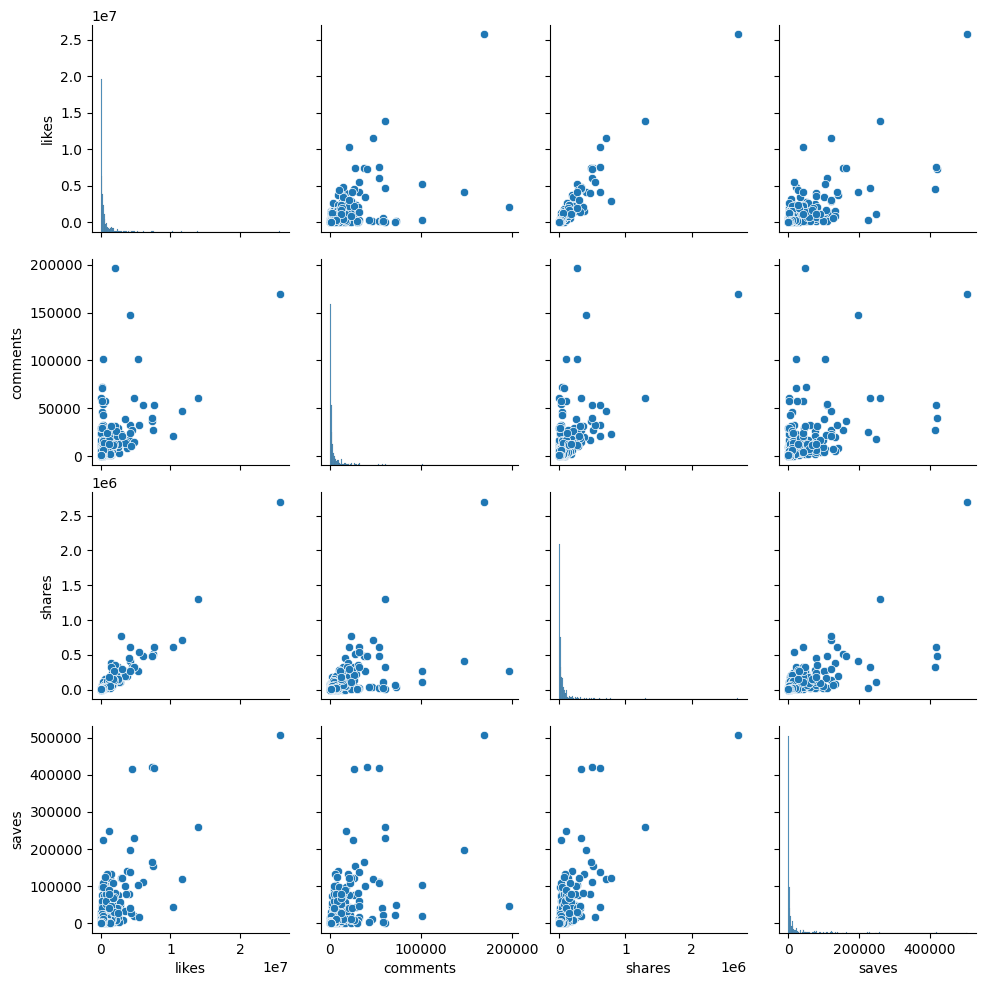

In [28]:
sns.pairplot(interactions)
plt.show()

Okay, there are a couple of issues with this graph: 
a) it's too big in size
b) the plots are squashed due to outlier values
c) the dots are too big

Below, I'm doing a few things:
1. taking the log values of every cell in our dataframe (to reduce the effect of outliers)
2. adjusting the height of each subplot
3. showing the regression line, in order to see if there is a linear relationship (we do this with `kind="reg"`

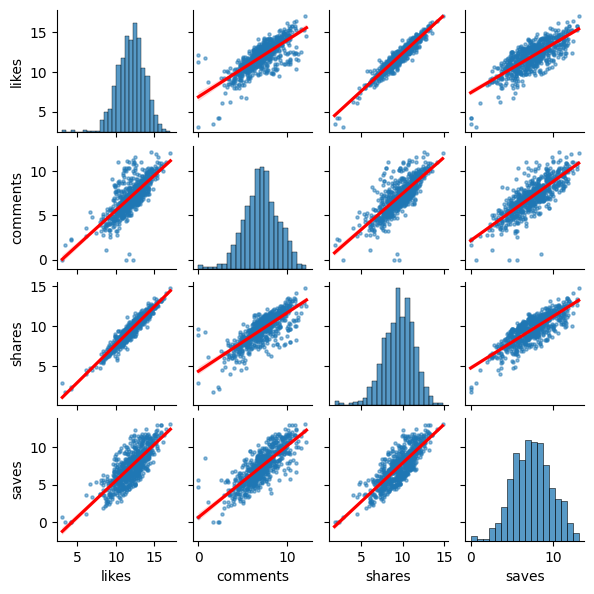

In [29]:
import numpy as np
logInter = np.log1p(interactions)
sns.pairplot(logInter, kind='reg',
             height=1.5, aspect=1, # control the height of each subplot
             plot_kws={'scatter_kws': {'alpha': 0.5, 's': 5}, 
                       'line_kws': {'color': 'red'}}, 
                        )
plt.show()

If my goal is only exploratory analysis, then this graph is good enough to show me the relationships between the variables. However, let's assume for the moment that I want to include such a graph into a publication. In that case, I might want to change many more little things to make it more readable. For example:

1. I will change the range of x and y axes for each subplot, so that they are uniform
2. I will change the color of the subplots (I don't like the defaultcolor)
3. I will change the font size of all subplots because it looks too big (both labels and ticks)
4. I will make the upper half of the matrix "disappear", becuase it's identical to the lower half.

Making all these changes is not trivial, since pairplot is a wrapper function and one needs to go deep into its components to make changes. I gave instructions to a generative AI for the effects that I wanted (one by one) and I put together the code below. It was an iterative process, which is worth doing only for publication quality plots (such as research papers).

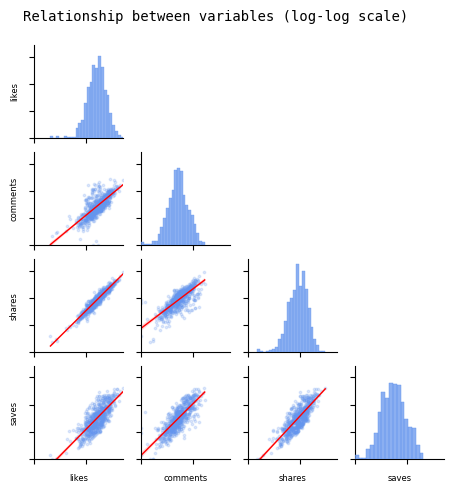

In [30]:
g = sns.pairplot(logInter, kind='reg',
                 height=1.2, aspect=1, # control the height of each subplot
                 plot_kws={'scatter_kws': {'alpha':0.2, 'color':'#6495ED','s': 3}, 
                           'line_kws': {'color': 'red', 'lw':1}}, 
                 diag_kws={'color':'#6495ED', 'edgecolor': '#6495ED'}
                        )

globalMin = logInter.min().min() # since there are two dimensions in the table, we need to take the min twice
globalMax = logInter.max().max()

# Set the same axis limits for all subplots
for i in range(logInter.shape[1]): # iterate of the number of columns
    for j in range(logInter.shape[1]):
        g.axes[i, j].set_xlim(globalMin, globalMax)
        g.axes[i, j].set_ylim(globalMin, globalMax)

# Loop through the axes and set the font size
for ax in g.axes.flatten():
    # Set the font size for the x-axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize=6)
    # Set the font size for the y-axis labels
    ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    # Set the font size for the tick labels on both axes
    ax.tick_params(axis='both', labelsize=6)

    # since we have log-scale, we should not show ticsk that are irrelevant
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Hide the upper triangle of plots
    for i in range(len(g.axes)):
        for j in range(i+1, len(g.axes)):
            g.axes[i][j].set_visible(False)

g.fig.suptitle('Relationship between variables (log-log scale)', 
               fontsize=10, fontname='monospace',
               verticalalignment='top', y=1.05, ha='center')
plt.show()